<div style="background-color:LightBlue; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Multi-Agent Reinforcement Learning Project - Atari</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;">
        <table style="margin: auto; border-collapse: collapse; color: black;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Rogier Gernaat</td>
                <td style="border: 0;">RogierHHS</td>
            </tr>
            <tr>
                <td style="border: 0;">Daan Eising</td>
                <td style="border: 0;">DaanEising</td>
            </tr>
            <tr>
                <td style="border: 0;">Julia Boschman</td>
                <td style="border: 0;">JuliaBoschman</td>
            </tr>
            <tr>
                <td style="border: 0;">Jort Akershoek</td>
                <td style="border: 0;">JortAkershoek</td>
            </tr>
        </table>
    </p></div>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="" alt="warlords_ss.png" style="width: 1000px; height: auto;">
</div>


- ***Docent***: Vikram Radhakrishnan
- ***Datum***: 08-04-2025


---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Inhoudsopgave </strong></h2>
</div>

## **Inhoudsopgave**

1. [H1: Inleiding](#1.0)
   - [&sect;1.1: Imports en Setup](#1.1)  
  
2. [H2: Kiezen van Algoritme](#2.0)  
   - [&sect;2.1: Kiezen van RL-Algoritme](#2.1)    
   - [&sect;2.3: Kiezen van Trainingsstrategie](#2.3)  

3. [H3: Probleemdefinitie](#3.0)  
   - [&sect;3.1: Wat is het probleem?](#3.1)   

4. [H4: Ontwerp en Implementatie](#4.0)  
   - [&sect;4.1: Baseline strategie ontwikkelen](#4.1)  
   - [&sect;4.2: Selectie van DRL algoritme en frameworks](#4.2)   
   - [&sect;4.3: Implementatie MARL-agent](#4.3)  

5. [H5: Training en Hyperparameter Search](#5.0)  
   - [&sect;5.1: Training](#5.1)  
   - [&sect;5.2: Selectie en tuning van hyperparameters](#5.2)  

6. [H6: Evaluatie en Vergelijking](#6.0)  
   - [&sect;6.1: Evaluatie t.o.v. baseline](#6.1)  
   - [&sect;6.2: Analyse met metrics](#6.2)  
   - [&sect;6.3: Visualisatie van resultaten](#6.3)  

7. [H7: Rapportage en Reflectie](#7.0)  
   - [&sect;7.1: Methodologie en aanpak](#7.1)  
   - [&sect;7.2: Samenvatting van resultaten](#7.2)  
   - [&sect;7.3: Reflectie op model, prestaties en uitbreidingsmogelijkheden](#7.3)  

8. [H8: Literatuurlijst](#8.0)  

9. [H9: Beoordelingscriteria](#9.0)



---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H1: Inleiding </strong></h2>
</div>

Deze opdracht richt zich op het toepassen van Multi-Agent Reinforcement Learning (MARL) in een complexe, competitieve omgeving. Het doel is om een agent te ontwikkelen die zelfstandig leert te concurreren en samen te werken met andere agenten binnen de Atari-game Warlords. Hiervoor wordt gebruikgemaakt van de PettingZoo-omgeving, waarin meerdere agenten gelijktijdig tegen elkaar spelen, en wordt het algoritme Proximal Policy Optimization (PPO) ingezet voor training.

In het notebook wordt stap voor stap uitgelegd hoe:
De Warlords-omgeving wordt opgezet en geïnitialiseerd.
Agents worden aangemaakt en getraind met behulp van PPO en Stable-Baselines3.
Er een baseline wordt ontwikkeld (een random agent) ter vergelijking met het getrainde model.
Verschillende hyperparameters worden getest en geoptimaliseerd.
De prestaties van de agenten worden geëvalueerd en gevisualiseerd.
Resultaten en bevindingen helder worden geanalyseerd en besproken.

Het notebook is bedoeld om het volledige proces inzichtelijk te maken: van het begrijpen van de opdracht, het opzetten van een multi-agent omgeving, tot aan het trainen, evalueren en vergelijken van verschillende strategieën.

<a name='1.1'></a>
<h3>&sect;1.1: Imports en Setup</h3>

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Pip install's</strong>
</div>



In [9]:
# Install the necessary libraries

!pip install gym
!pip install stable_baselines3
!pip install gymnasium[atari]
!pip install pettingzoo[atari]
!pip install "autorom[accept-rom-license]"
!pip install --find-links dist/ --no-cache-dir AutoROM[accept-rom-license]
!pip install supersuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Importeren van de library's</strong>
</div>



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import gymnasium as gym
import os
import time
import imageio
import importlib
from collections import defaultdict, Counter

from stable_baselines3 import PPO
from stable_baselines3.ppo import CnnPolicy

from pettingzoo.atari import warlords_v3
from pettingzoo.utils import BaseParallelWrapper
import supersuit as ss

from google.colab import drive
!AutoROM

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/AutoROM/roms
	/usr/local/lib/python3.11/dist-packages/multi_agent_ale_py/roms

Existing ROMs will be overwritten.

I own a license to these Atari 2600 ROMs.
I agree to not distribute these ROMs and wish to proceed: [Y/n]: y
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.11/dist-packages/multi_agent_ale_py/roms/adventure.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.11/dist-packages/multi_agent_ale_py/roms/air_raid.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.11/dist-packages/multi_agent_ale_py/roms/alien.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.11/dist-packages/multi_agent_ale_py/roms/amidar.bin
Installed /usr/local/

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Mounten van colab drive en inladen van de agents</strong>
</div>

In [11]:

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Autonomous Systems')
print(os.listdir('/content/drive/MyDrive/Autonomous Systems'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[]



---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H2: Kiezen van Algoritme </strong></h2>
</div>

## §2.1: Kiezen van RL-Algoritme

In deze opdracht staat de Atari-game **Warlords** centraal: een klassieke arcadegame waarbij vier spelers (agents) gelijktijdig strijden op een speelveld. Iedere agent verdedigt zijn eigen kasteel en probeert de anderen uit te schakelen, wat resulteert in een typisch **multi-agent scenario** met zowel competitie als wisselende interactiepatronen tussen agents. Voor deze complexe en dynamische omgeving is het belangrijk om een reinforcement learning-algoritme te kiezen dat bewezen effectief is bij problemen met een hoge mate van onzekerheid, veel mogelijke toestanden en meerdere spelers.

We kiezen voor het **Proximal Policy Optimization (PPO)** algoritme als basis voor onze agent. PPO is een krachtig, modern en veelgebruikt algoritme binnen deep reinforcement learning. Het is ontworpen voor stabiliteit en efficiëntie bij het optimaliseren van beleid (policies), en heeft uitstekende prestaties laten zien in visuele, dynamische omgevingen zoals Atari-games. PPO leert direct van ruwe pixeldata via een convolutioneel neuraal netwerk en maakt gebruik van policy-gradient updates die gecontroleerd worden uitgevoerd om instabiliteit te voorkomen.

### Waarom PPO?

- **Geschikt voor visuele input:**  
  PPO werkt uitstekend met ruwe spelbeelden (frames) als input, en kan daardoor zelfstandig complexe strategieën ontwikkelen zonder handmatige feature engineering. De convolutionele neurale netwerken van PPO zijn uitermate geschikt voor het herkennen van visuele patronen in Atari-omgevingen.

- **Stabiel en robuust leren:**  
  Door het gebruik van trust-region updates (clipping), mini-batch learning en advantage schatting (GAE), blijft het leerproces gecontroleerd en raakt het model minder snel verstrikt in abrupte of onstabiele policy-wijzigingen. Dit is cruciaal in chaotische multi-agent omgevingen zoals Warlords.

- **Multi-agent compatibiliteit:**  
  PPO laat zich eenvoudig toepassen op multi-agent settings, bijvoorbeeld via parameter sharing (één policy voor meerdere agents) of door individuele policies te trainen per agent. Dit maakt het flexibel inzetbaar voor uiteenlopende experimenten.

- **Breed onderzocht en veel gebruikt:**  
  PPO behoort tot de standaardbenchmarks in reinforcement learning en is in tal van studies succesvol ingezet voor Atari-omgevingen en multi-agent settings. Er zijn veel goed onderhouden frameworks beschikbaar (zoals Stable-Baselines3 en PettingZoo), wat snelle en correcte implementatie mogelijk maakt.

### Concreet voordeel voor deze opdracht

- **Algoritmische robuustheid:**  
  PPO is bijzonder effectief in dynamische en onvoorspelbare omgevingen waar het gedrag van andere agents voortdurend verandert. Dankzij gecontroleerde policy-updates en efficiënte verwerking van ervaringen is PPO in staat om robuuste strategieën te ontwikkelen.

- **Vergelijkbaarheid:**  
  PPO is een veelgebruikte standaard in de literatuur rondom Atari en multi-agent reinforcement learning. Hierdoor zijn onze resultaten goed te vergelijken met bestaande benchmarks en alternatieve algoritmes (zoals DQN of random policies).

- **Transparantie en reproduceerbaarheid:**  
  Dankzij de brede adoptie en solide implementaties in frameworks als Stable-Baselines3 en PettingZoo zijn onze experimenten eenvoudig te reproduceren, uit te breiden en te valideren door andere studenten of onderzoekers.


### **Uitleg van PPO**

Proximal Policy Optimization (PPO) is een geavanceerd reinforcement learning-algoritme dat veel wordt gebruikt voor het trainen van agents in complexe omgevingen zoals Atari-spellen. PPO verbetert eerdere policy-gradient-methodes door bij elke stap de aanpassing van het beleid (“policy”) te beperken. Hierdoor wordt het leerproces stabieler en is de kans kleiner dat de agent ineens “vergeet” wat hij geleerd heeft.

PPO werkt door het beleid steeds een klein beetje aan te passen op basis van ervaringen uit de omgeving. Hierdoor leert de agent efficiënter en zijn de resultaten vaak beter reproduceerbaar. PPO is ook geschikt voor situaties met hoge-dimensionale input, zoals beelden, en werkt goed in multi-agent omgevingen zoals Warlords.

DhanushKumar (2024)

### **Motivatie**

Voor deze opdracht heb ik gekozen voor het algoritme Proximal Policy Optimization (PPO). De belangrijkste reden hiervoor is dat PPO bekend staat om zijn stabiliteit en efficiëntie bij het trainen van agents in complexe omgevingen met hoge-dimensionale input, zoals de Atari-game Warlords, Schulman et al. (2017). Omdat PPO de aanpassingen aan het beleid per stap beperkt, blijft het leerproces gecontroleerd en voorkom je dat de agent tijdens het trainen “vergeet” wat eerder geleerd is. Dit is vooral belangrijk in multi-agent omgevingen, waar het gedrag van andere agents de situatie voortdurend beïnvloedt.

Daarnaast is PPO eenvoudig te implementeren dankzij bestaande libraries zoals stable-baselines3, waardoor het mogelijk is om snel te experimenteren met verschillende hyperparameters. De standaardwaarden die ik voor de belangrijkste hyperparameters heb gekozen, zijn gebaseerd op aanbevelingen uit de literatuur en eerdere succesvolle toepassingen in vergelijkbare omgevingen (The 37 Implementation Details Of Proximal Policy Optimization · The ICLR Blog Track, 2022). PPO is bovendien goed schaalbaar, waardoor het geschikt is om in een multi-agent setting zoals Warlords verschillende agents onafhankelijk van elkaar te trainen en te vergelijken.

Door deze eigenschappen is PPO naar mijn mening de meest geschikte keuze voor deze opdracht, omdat het zorgt voor betrouwbare leerresultaten en flexibiliteit biedt bij het uitvoeren van experimenten met verschillende agents en trainingsinstellingen.

### **Aanpak**

Voor deze opdracht heb ik een PPO-agent geïmplementeerd met behulp van de stable-baselines3 library. PPO is gekozen vanwege de stabiele prestaties en de robuustheid bij het trainen in omgevingen met beeldinput, zoals “Warlords”. De agent gebruikt een convolutioneel neuraal netwerk om de observaties te verwerken.
De belangrijkste hyperparameters zijn gekozen op basis van aanbevolen waarden uit wetenschappelijke literatuur voor Atari-omgevingen, maar kunnen verder geoptimaliseerd worden.
Mijn implementatie maakt het makkelijk om het model op te slaan, opnieuw te laden en te evalueren, zodat experimenten goed reproduceerbaar zijn.

<a name='1.1'></a>
<h3>&sect;2.3: Kiezen van Trainingsstrategie</h3>

### Trainingsstrategie in Multi-Agent Warlords

Om optimaal gebruik te maken van het gekozen algoritme, hanteren we een trainingsstrategie die inspeelt op de uitdagingen van multi-agent reinforcement learning:

1. **Multi-agent omgeving:**  
   In Warlords zijn altijd meerdere agents actief. Onze PPO-agent wordt getraind door herhaaldelijk games te spelen tegen vooraf ingestelde tegenstanders, zoals random agents of (indien gewenst) andere PPO-agents. Dit zorgt ervoor dat de agent leert in een realistische, competitieve setting.

2. **Variatie in tegenstanders:**  
   Door de agent bloot te stellen aan verschillende typen tegenstanders (van random tot geavanceerd), voorkomen we dat de agent eenzijdige strategieën aanleert. Zo ontwikkelt de agent robuustere, meer generaliseerbare strategieën.

3. **Observatie- en actie-preprocessing:**  
   We gebruiken beeldverwerkingstechnieken zoals grijswaardenconversie, rescaling en stacking van frames. Dit zorgt ervoor dat de agent alleen de essentiële informatie uit het spel verwerkt, waardoor het leerproces efficiënter verloopt.

4. **On-policy leren & rollouts:**  
   PPO werkt met zogenoemde rollouts: de agent verzamelt verse trajecten door de omgeving en leert direct van deze actuele ervaringen. Dit betekent dat elke policy-update gebaseerd is op recent gedrag, wat bijdraagt aan stabiliteit en effectieve policy-veranderingen.

5. **Regelmatige evaluatie en hyperparameter tuning:**  
   Tijdens de training evalueren we regelmatig de prestaties van de agent door deze te laten spelen tegen de baseline (zoals een random agent). Daarnaast experimenteren we met verschillende hyperparameters, zoals learning rate, batch size, en de clipping-range van PPO, om de optimale instellingen te bepalen.

6. **Logging en visualisatie:**  
   Alle trainingsresultaten (zoals reward curves, winpercentages, etc.) worden gelogd en gevisualiseerd. Hierdoor kunnen we het leerproces volgen en analyseren, en waar nodig de strategie bijstellen.

### Samenvattend

Deze aanpak zorgt ervoor dat onze PPO-agent niet alleen leert van het eigen gedrag, maar zich ook kan aanpassen aan verschillende soorten tegenstanders. Door systematisch te trainen, evalueren en hyperparameters te tunen, halen we het maximale uit ons algoritme en maken we de voordelen van reinforcement learning in een multi-agent context helder zichtbaar.



---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H3: Probleemdefinitie </strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;3.1: Wat is het probleem?</h3>

#### Probleemanalyse
De opkomst van multi-agent omgevingen in toepassingen zoals robotica, games en logistiek vraagt om slimme algoritmes die kunnen concurreren én samenwerken. In de praktijk betekent dit dat agents hun strategieën continu moeten bijstellen op basis van het gedrag van andere agents in hun omgeving. In de Atari-game Warlords komen vier agents tegelijkertijd in actie, waarbij hun succes afhankelijk is van zowel hun eigen keuzes als die van hun tegenstanders.

Single-agent reinforcement learning is onvoldoende, omdat hierbij wordt aangenomen dat de omgeving stationair is (niet verandert door anderen). In multi-agent settings verandert de omgeving echter continu, omdat andere agents ook leren en hun gedrag aanpassen. Dit vraagt om een benadering waarbij agents niet alleen leren van hun eigen ervaringen, maar ook van de interacties met anderen.

Met multi-agent reinforcement learning (MARL) kunnen agents hun beleid optimaliseren terwijl ze rekening houden met de strategieën van anderen. Hierdoor ontstaan vaak complexe en onverwachte gedragingen die in single-agent settings niet mogelijk zijn. Bovendien kunnen MARL-methoden worden ingezet om situaties te modelleren waarin competitie, samenwerking of beide tegelijk nodig zijn.

##### Relevantie van het probleem
- In veel echte omgevingen zijn meerdere autonome beslissers actief (bijvoorbeeld zelfrijdende auto's in verkeer).
- Het ontwerpen van robuuste agents in zulke settings helpt bij het ontwikkelen van realistische, schaalbare en adaptieve AI-systemen.
- In de context van games als Warlords kan MARL inzichten bieden in hoe intelligente strategieën en tegenstrategieën ontstaan in competitieve settings.

##### Samenvatting probleemstelling (één zin):
"Hoe kunnen we effectieve, lerende agents ontwikkelen die optimaal presteren in een competitieve multi-agent omgeving, waarbij rekening wordt gehouden met de voortdurende interactie en dynamiek tussen verschillende agents?"

Scharwächter (2024)

#### Doelstelling
Het doel van deze opdracht is om een multi-agent reinforcement learning systeem te ontwerpen, implementeren en evalueren voor de Atari Warlords-omgeving. Dit gebeurt door een MARL-algoritme, PPO, te trainen en de prestaties te vergelijken met een baseline. Het eindresultaat is een reproduceerbaar systeem en een rapport met een diepgaande analyse van de werking en effectiviteit van het gekozen algoritme.


---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H4: Ontwerp en Implementatie</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;4.1: Baseline strategie ontwikkelen</h3>

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Baseline: Random Agent</strong>
</div>

Als startpunt voor het vergelijken van verschillende algoritmes is het belangrijk om een baseline te definiëren. In deze opdracht gebruiken we een random agent als baseline. Dit is een agent die bij elke stap willekeurig een van de mogelijke acties kiest, ongeacht de observatie of situatie in het spel.

**Waarom een random agent als baseline?**

Een random agent biedt een objectief referentiepunt: het laat zien wat de prestaties zouden zijn zonder enige vorm van intelligentie, strategie of leren. Door de resultaten van geavanceerdere agents (zoals een rule-based agent of een reinforcement learning agent zoals PPO) te vergelijken met deze random agent, kun je duidelijk aantonen of jouw aanpak daadwerkelijk beter presteert dan toeval.

**Implementatie**

De implementatie van de random agent is heel eenvoudig. De agent kiest telkens een willekeurige actie uit het totale aantal toegestane acties van de omgeving. In het geval van Atari Warlords zijn dit bijvoorbeeld zes mogelijke acties.


In [9]:
class AgentRandomPolicy:
    def act(self, observation):
        # Return a random action (6 possible in ALE Warlords)
        return np.random.randint(6)


<a name='1.1'></a>
<h3>&sect;4.2: Selectie van DRL algoritme en frameworks</h3>

### Keuze van Algoritme

Voor deze opdracht, waarin de agent moet presteren in de **multi-agent omgeving van Atari Warlords**, kiezen we voor het **Proximal Policy Optimization (PPO)** algoritme. PPO is momenteel één van de meest gebruikte en robuuste algoritmes voor deep reinforcement learning, vooral geschikt voor problemen met complexe visuele input en multi-agent interactie. De belangrijkste voordelen van PPO:

- **Stabiel leren van ruwe pixels:** PPO maakt gebruik van convolutionele neurale netwerken (CNN’s) om direct van visuele observaties te leren, zonder handmatig feature engineering.
- **Uitstekende prestaties in Atari-omgevingen:** PPO heeft zich bewezen als benchmark-algoritme in veel Atari-games, mede dankzij de balans tussen exploratie en exploitatie.
- **Direct geschikt voor multi-agent settings:** PPO kan eenvoudig worden ingezet met *parameter sharing* (één policy voor meerdere agents) of individuele policies per agent, wat het flexibel maakt voor uiteenlopende MARL-experimenten.

### Keuze & Motivatie

In deze opdracht trainen we een **PPO-agent** in de multi-agent Warlords-omgeving. Hierbij nemen onze agenten het op tegen ingebouwde tegenstanders, zoals random agents. Zo kunnen we de kracht van deep RL aantonen in vergelijking met simpele baseline strategieën.

#### Waarom PPO in deze context?

- **Stabiele policy learning:** PPO minimaliseert het risico op instabiliteit door gecontroleerde policy-updates (clipping), wat vooral belangrijk is in chaotische multi-agent omgevingen.
- **Visual input:** Warlords levert observaties als pixeldata, wat naadloos aansluit op de CNN-architectuur van PPO.
- **Flexibiliteit:** PPO werkt zowel met discrete als continue actie-ruimtes en laat zich makkelijk combineren met moderne MARL frameworks.

---

### Packages en Frameworks

Voor de implementatie en evaluatie maken we gebruik van de volgende frameworks en libraries:

#### 1. **Stable-Baselines3**
- Biedt een krachtige en stabiele implementatie van PPO, met uitgebreide ondersteuning voor logging en evaluatie.
- Direct compatibel met vectorized en custom omgevingen.

#### 2. **PettingZoo**
- De standaard voor multi-agent reinforcement learning omgevingen, met een ruime keuze aan benchmarkomgevingen zoals Atari Warlords.
- Zorgt voor een uniforme interface en maakt snelle experimentatie mogelijk.

#### 3. **Supersuit**
- Bibliotheek voor preprocessing (o.a. frames resizen, kleuren reduceren en frame stacking), essentieel voor efficiënte training op visuele data.

---

### Samenvatting van de strategie

- We trainen een PPO-agent in de **PettingZoo Atari Warlords** omgeving tegen baseline agents (zoals random).
- PPO stelt ons in staat om efficiënt en stabiel te leren in deze multi-agent setting, met als doel beter te presteren dan eenvoudige baselines.
- Door te bouwen op bewezen frameworks en preprocessing pipelines is onze aanpak **reproduceerbaar, schaalbaar en robuust**.

---


<a name='1.1'></a>
<h3>&sect;4.3: Implementatie MARL-agent</h3>

d.	Resultaat: Een werkend MARL-systeem dat klaar is voor training en evaluatie.

<div style="background-color:white; color:black; padding: 10px;">
    <strong>(Rogier) PPO Agent ( DEZE FUNCTIE NOG ZETTEN BIJ DE TRAINING STAP )</strong>
</div>

In de onderstaande cel definiëren we de klasse MARLAgentPPO, een modulair systeem dat geschikt is voor het trainen van PPO-agenten in een multi-agent setting met behulp van de PettingZoo-omgeving warlords_v3. De klasse bevat methoden voor het instellen van de omgeving, het trainen van het model, en het opslaan of laden van een getraind PPO-model.

 -   De omgeving wordt gepreprocessed met behulp van Supersuit-wrappers (zoals black_death, color_reduction, resizing en frame stacking).

-  Vervolgens wordt de omgeving geconverteerd naar een vectorized environment die compatibel is met Stable-Baselines3.

-   De train()-methode traint het PPO-model met een CnnPolicy, geschikt voor de beeldinvoer van Atari-games.

-  Met save() en load() kunnen getrainde modellen eenvoudig worden opgeslagen of ingeladen.

Deze klasse maakt het mogelijk om met ons MARL-systeem op een reproduceerbare en schaalbare manier PPO-agenten te trainen in een multi-agent omgeving.

(PPO — Stable Baselines3 2.7.0a0 Documentation, z.d.)

# MARL PPO met meer parameters

In [16]:
class MARLAgentPPO:
    """
    Multi-Agent RL systeem voor de Atari Warlords omgeving.
    Ondersteunt setup, training, evaluatie en het opslaan/laden van PPO-modellen.
    """

    def __init__(
        self,
        num_vec_envs=2,
        frame_stack=4,
        x_size=84,
        y_size=84,
        batch_size=256,
        total_timesteps=4_000_000,
        verbose=1
    ):
        """
        Initialiseer de omgeving en hyperparameters.
        """
        self.num_vec_envs = num_vec_envs
        self.frame_stack = frame_stack
        self.x_size = x_size
        self.y_size = y_size
        self.batch_size = batch_size
        self.total_timesteps = total_timesteps
        self.verbose = verbose

        self.env = self._make_env()
        self.vec_env = self._make_vec_env()
        self.model = None

    def _make_env(self):
        """
        Zet de Warlords-omgeving klaar met preprocessing-wrappers.
        """
        env = warlords_v3.parallel_env()
        env = ss.black_death_v3(env)
        env = ss.color_reduction_v0(env, mode='full')
        env = ss.resize_v1(env, x_size=self.x_size, y_size=self.y_size)
        env = ss.frame_stack_v1(env, self.frame_stack)
        return env

    def _make_vec_env(self):
        """
        Converteer naar een vectorized environment voor Stable-Baselines3.
        """
        vec_env = ss.pettingzoo_env_to_vec_env_v1(self.env)
        vec_env = ss.concat_vec_envs_v1(
            vec_env,
            num_vec_envs=self.num_vec_envs,
            num_cpus=1,
            base_class="stable_baselines3"
        )
        return vec_env

    def train(self):
        """
        Initialiseer en train het PPO-model met geoptimaliseerde hyperparameters.
        """
        print("Start training...")
        self.model = PPO(
            CnnPolicy,
            self.vec_env,
            verbose=self.verbose,
            batch_size=self.batch_size,
            n_steps=128,
            n_epochs=4,
            learning_rate=2.5e-4,
            ent_coef=0.01,
            gae_lambda=0.95,
            gamma=0.99,
            clip_range=0.1,
            vf_coef=0.5,
            max_grad_norm=0.5,
            tensorboard_log="./ppo_warlords_tensorboard/"
        )
        self.model.learn(total_timesteps=self.total_timesteps)
        print("Training gereed.")

    def save(self, model_name=None):
        """
        Sla het getrainde model op, optioneel met custom naam.
        """
        if self.model is None:
            raise ValueError("Model is nog niet getraind.")
        if model_name is None:
            timestamp = time.strftime("%Y%m%d-%H%M%S")
            model_name = f"warlords_ppo_model_{timestamp}"
        self.model.save(model_name)
        print(f"Model opgeslagen als {model_name}")

    def load(self, path):
        """
        Laad een eerder getraind PPO-model.
        """
        self.model = PPO.load(path)
        print(f"Model geladen van {path}")


#Bronnen: (PettingZoo Documentation, warlords, z.d.), (PettingZoo Documentation, supersuit_wrappers, z.d.-b), (PPO — Stable Baselines3 2.7.0a0 Documentation, z.d.-b)


In [ ]:
agent2 = MARLAgentPPO()
agent2.train()
agent2.save("ppo_model_warlords_4m")
save_path = "/content/drive/MyDrive/MARL_models"
import os


os.makedirs(save_path, exist_ok=True)


model_name = os.path.join(save_path, "warlords_ppo_model_4m")
agent2.save(model_name)

Start training...
Using cuda device
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


Streaming output truncated to the last 5000 lines.
|    approx_kl            | 0.0024425047 |
|    clip_fraction        | 0.0933       |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.72        |
|    explained_variance   | 0.219        |
|    learning_rate        | 0.00025      |
|    loss                 | -0.0296      |
|    n_updates            | 14516        |
|    policy_gradient_loss | -0.00833     |
|    value_loss           | 1.77e-05     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 591          |
|    iterations           | 3631         |
|    time_elapsed         | 6289         |
|    total_timesteps      | 3718144      |
| train/                  |              |
|    approx_kl            | 0.0040649907 |
|    clip_fraction        | 0.151        |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.72        |
|  

In [ ]:

save_path = "/content/drive/MyDrive/MARL_models"


os.makedirs(save_path, exist_ok=True)

model_name = os.path.join(save_path, "warlords_ppo_model")
agent.save(model_name)


Model opgeslagen als /content/drive/MyDrive/MARL_models/warlords_ppo_model


In [ ]:
agent.load("ppo_model_warlords")

Model geladen van ppo_model_warlords


In [ ]:
model_path = "/content/drive/MyDrive/MARL_models/warlords_ppo_model_4m.zip"
agent.load(model_path)


---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H5: Training en Hyperparameter Search</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;5.1: Training</h3>

### Hoe verloopt de training van een PPO-agent?

De training van een PPO-agent (Proximal Policy Optimization) in een omgeving zoals Atari Warlords bestaat uit een reeks vaste stappen die gericht zijn op stabiliteit en efficiënt leren. Tijdens elke trainingscyclus verzamelt de agent zogenaamde 'rollouts': sequenties van observaties, acties en rewards die worden gegenereerd door het huidige beleid. Op basis van deze trajecten berekent PPO met Generalized Advantage Estimation (GAE) hoe gunstig elke actie was ten opzichte van de verwachting, wat helpt om het leerproces stabieler en nauwkeuriger te maken.

De kern van PPO ligt in het voorzichtig updaten van het beleid. In plaats van grote stappen (die tot instabiliteit kunnen leiden), worden policy-updates beperkt door een clipping-mechanisme. Dit voorkomt dat het geleerde beleid te veel verandert per trainingsstap, waardoor de kans op catastrofaal “vergeten” sterk wordt verminderd. De verzamelde rollouts worden verdeeld over mini-batches en gedurende meerdere epochs gebruikt om zowel het beleid (policy) als de value-functie (critic) te verbeteren. Tegelijkertijd stimuleert PPO via een entropiebonus dat de agent in het begin veel blijft exploreren, wat de kans op het vinden van sterke strategieën vergroot.

Tijdens en na de training wordt de agent regelmatig geëvalueerd zonder extra ruis, zodat duidelijk wordt hoe effectief het geleerde beleid is in de praktijk. Door deze aanpak is PPO bijzonder geschikt voor complexe, visuele en multi-agent omgevingen, waarbij gecontroleerd leren en robuuste prestaties essentieel zijn.


<div style="background-color:white; color:black; padding: 10px;">
    <strong>Omgeving opzetten</strong>
</div>


In deze stap initialiseren we de multi-agent Warlords-omgeving met behulp van PettingZoo. We passen verschillende bewerkingen toe op de raw game frames:
- `warlords_v3.parallel_env()`: Laadt de 4-speler Warlords-omgeving waarbij alle agents gelijktijdig acties nemen.
- `ss.black_death_v3(env)`: Zorgt ervoor dat agents die "dood" gaan toch in de omgeving blijven als placeholder, zodat de agent-count altijd gelijk blijft.
- `ss.color_reduction_v0(env, mode='full')`: Zet de gekleurde frames om naar grijswaarden, waardoor de inputdimensie kleiner wordt en het leren efficiënter.
- `ss.resize_v1(env, x_size=84, y_size=84)`: Schaal de beelden terug naar 84x84 pixels (standaard in Atari-RL-onderzoek).
- `ss.frame_stack_v1(env, 4)`: Stapelt de laatste 4 frames, zodat het model ook bewegingsinformatie kan oppikken (belangrijk bij visuele input).

---

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Converteren naar een vectorized env voor Stable-Baselines3</strong>
</div>

Stable-Baselines3 werkt het best met vectorized environments, waarbij meerdere instanties van de omgeving parallel kunnen draaien:
- `ss.pettingzoo_env_to_vec_env_v1(env)`: Zet de PettingZoo-omgeving om naar een formaat dat door SB3 wordt herkend.
- `ss.concat_vec_envs_v1(...)`: Combineert meerdere vectorized omgevingen tot één, zodat batchgewijze training mogelijk is (hier draaien 2 parallelle omgevingen op 1 CPU).

---

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Defineren en trainen van het PPO model</strong>
</div>

We definiëren het PPO-model dat gebruikmaakt van een convolutioneel neuraal netwerk (CnnPolicy), geschikt voor visuele input zoals Atari-frames:
- `PPO(CnnPolicy, vec_env, ...)`: Initialiseer het PPO-algoritme met de eerder gemaakte vectorized environment.
- `total_timesteps`: Bepaalt hoe lang het model traint. Meer timesteps betekent meestal beter getrainde agenten.
- `model.learn(...)`: Start het daadwerkelijke leerproces. Het model verzamelt data, leert van ervaringen en past het beleid continu aan.

---

<div style="background-color:white; color:black; padding: 10px;">
    <strong>Opslaan van het getrainde model met timestamp</strong>
</div>

Na de training slaan we het model op, waarbij automatisch een timestamp aan de bestandsnaam wordt toegevoegd:
- `time.strftime(...)`: Maakt een string van de huidige datum en tijd.
- `model.save(model_name)`: Slaat het getrainde model op onder een unieke naam, zodat je het later gemakkelijk kunt laden en evalueren.

---

## Interpretatie van de PPO Trainingsoutput

Tijdens het trainen van het PPO-model worden verschillende statistieken gelogd. Hieronder lichten we de belangrijkste waarden uit, zodat duidelijk wordt wat ze betekenen en hoe ze geïnterpreteerd kunnen worden:

| **Metric**               | **Waarde**      | **Toelichting**                                                                                                                                             |
|------------------------- |-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **fps**                  | 472             | *Frames per second* – het aantal frames (omgevingsstappen) dat per seconde wordt verwerkt. Een hoge waarde betekent dat het trainen efficiënt verloopt.     |
| **iterations**           | 8               | Aantal PPO-updates die zijn uitgevoerd sinds de start van de training.                                                                                      |
| **time_elapsed**         | 277             | Totale verstreken tijd (in seconden) sinds het begin van de training.                                                                                       |
| **total_timesteps**      | 131072          | Het aantal omgevingsstappen (frames/acties) dat het model tot nu toe heeft gezien.                                                                          |

### Train-metrics

| **Metric**                   | **Waarde**        | **Toelichting**                                                                                                                                             |
|------------------------------|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **approx_kl**                | 0.00897           | Gemiddelde KL-divergence tussen het oude en het nieuwe beleid. Een lage waarde duidt op kleine wijzigingen per update, wat zorgt voor stabiel leren.         |
| **clip_fraction**            | 0.088             | Percentage van de policy-updates die beperkt (“geclipped”) werden. Veel clipping betekent dat het model te grote stappen probeert te maken (mogelijk instabiel). |
| **clip_range**               | 0.2               | Maximale toegestane relatieve verandering per update (standaard bij PPO).                                                                                   |
| **entropy_loss**             | -1.77             | De entropie van het beleid: een maat voor exploratie. Een lagere (meer negatieve) waarde betekent dat het beleid voorspelbaarder wordt (minder exploratie).   |
| **explained_variance**       | -0.0209           | Meet hoe goed de value-functie de daadwerkelijke rewards voorspelt (1.0 = perfect, 0 = slecht, <0 = erger dan gokken).                                      |
| **learning_rate**            | 0.0003            | De snelheid waarmee het model leert; hogere waardes versnellen leren, maar kunnen leiden tot instabiliteit.                                                 |
| **loss**                     | -0.0226           | Totale loss-functie (mix van policy, value en entropy loss) die wordt geminimaliseerd tijdens training.                                                     |
| **n_updates**                | 70                | Totaal aantal policy-updates tot nu toe uitgevoerd.                                                                                                         |
| **policy_gradient_loss**     | -0.0133           | De bijdrage van de policy-gradient aan de totale loss. Negatiever betekent sterkere updates in de richting van meer reward.                                 |
| **value_loss**               | 0.00265           | Fout van de value-functie; hoe kleiner, hoe beter het model toekomstige rewards kan voorspellen.                                                            |

---

### Richting van de Waarden: Wat wil je zien?

- **fps**: Hoger is beter – snellere training.
- **iterations / n_updates / total_timesteps**: Hoger betekent meer getraind (maar let op overfitting).
- **approx_kl**: Laag (bijv. tussen 0.01 en 0.05) = stabiel leren. Te hoog: beleid verandert te snel en wordt instabiel; te laag: leren gaat traag.
- **clip_fraction**: Typisch rond 0.1–0.3. Te hoog kan instabiliteit betekenen, te laag kan duiden op te weinig leereffect.
- **entropy_loss**: Minder negatief betekent meer exploratie. Naarmate het model zekerder wordt, daalt de entropie. Een te lage entropie betekent mogelijk te weinig exploratie.
- **explained_variance**: Hoger is beter. Richtwaarde: richting 1.0 is perfect, 0 is slecht, <0 betekent dat de value-functie slechter presteert dan gokken.
- **learning_rate**: Hogere waardes versnellen het leren maar verhogen het risico op instabiliteit.
- **loss / value_loss**: Lager is beter – betekent dat het model beter de returns/value weet te voorspellen en de policy verbetert.

#### **Samenvatting**
Deze statistieken geven inzicht in hoe snel en stabiel het PPO-model leert. Let vooral op de **KL-divergence** (voor stabiliteit), **clip_fraction** (voor learning dynamics), en **explained_variance** (voor de nauwkeurigheid van de value-voorspelling).


<a name='1.1'></a>
<h3>&sect;5.2: Selectie en tuning van hyperparameters</h3>

### **Hyperparameters**

##### ***Overzicht keuzes***





| Hyperparameter        | Waarde    | Uitleg                                                                                 |
|----------------------|-----------|----------------------------------------------------------------------------------------|
| `Policy`              | CnnPolicy | Gebruikt convolutieneurale netwerken, geschikt voor beeldinput zoals bij Atari-games   |
| `learning_rate`        | 2.5e-4    | Standaardwaarde voor PPO in Atari-omgevingen; zorgt voor een goede balans tussen snel leren en stabiliteit |
| `gamma`                | 0.99      | Kortingfactor; waardeert toekomstige beloningen bijna net zo hoog als directe beloning |
| `n_steps`              | 128       | Aantal stappen per update; bepaalt hoeveel ervaringen per batch worden verzameld       |
| `batch_size`           | 256       | Grootte van elke batch die wordt gebruikt tijdens het updaten van het beleid           |
| `ent_coef (entropie)`  | 0.01      | Coëfficiënt voor exploratie; hogere waarde zorgt voor meer exploratiegedrag            |
| `verbose`              | 1         | Zorgt voor gedetailleerde logging tijdens het trainen                                  |

#### **Experimenteren met hyperparameters**
Tijdens het trainen heb ik geëxperimenteerd met verschillende waarden voor de learning rate, entropie-coëfficiënt en batch size:
- **Learning rate:** Een hogere learning rate zorgde voor snellere training, maar maakte het model soms instabiel. 2.5e-4 bleek een goed compromis.
- **Entropie-coëfficiënt (ent_coef):** Met een hogere waarde ging de agent meer experimenteren, maar duurde het langer voordat hij goed leerde. 0.01 gaf een goede balans.
- **Batch size:** Grotere batches zorgden voor stabielere updates, maar vroegen meer geheugen.

De uiteindelijke hyperparameterkeuzes zijn gebaseerd op wat het beste werkte voor deze specifieke omgeving en op basis van literatuur.




---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H6: Evaluatie en Vergelijking</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;6.1: Evaluatie t.o.v. baseline</h3>

Om de prestaties van het getrainde model te kunnen beoordelen, is gekozen voor een vergelijking met een baseline. Deze baseline bestond uit agents die uitsluitend willekeurige acties uitvoerden, zonder enig leerproces. Tijdens de evaluatiefase is het PPO-model getest tegen deze random agents in 20 afzonderlijke episodes. De doelstelling was om vast te stellen of het getrainde model in staat zou zijn om significant beter te presteren dan niet-lerende tegenstanders.

Uit de resultaten bleek dat de PPO-agent (`first_0`) slechts één van de twintig spellen wist te winnen, met een gemiddelde reward van -0.90. De andere agents, die allen random gedrag vertoonden, behaalden gemiddeld betere resultaten. Zo wist de best scorende random agent (`fourth_0`) acht keer te winnen, met een gemiddelde reward van -0.20.

Op basis van deze gegevens kan worden geconcludeerd dat het PPO-model in deze vorm niet succesvol boven de baseline wist uit te stijgen. Mogelijke oorzaken hiervoor zijn dat de PPO-agent is getraind in een zelf-spelende omgeving en werd geëvalueerd tegen een totaal ander type gedrag, dat de trainingstijd relatief kort was en dat de visuele inputstructuur het leerproces heeft vertraagd. Daarnaast kan de interactiedynamiek met niet-lerende tegenstanders te weinig informatie hebben opgeleverd voor het ontwikkelen van effectief gedrag.

De vergelijking met de baseline maakt duidelijk dat het model nog niet robuust genoeg is om zich structureel aan te passen aan variabele tegenstanders. Om de prestaties te verbeteren, zou het zinvol zijn om het model ook te trainen tegen willekeurige of gescripte agents, zodat het leert omgaan met inconsistente strategieën zoals die in de testfase zijn toegepast.


<a name='1.1'></a>
<h3>&sect;6.2: Analyse met metrics</h3>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="" alt="warlords_4m_training.png" style="width: 1000px; height: auto;">
</div>

Tijdens het trainen van het PPO-model zijn in totaal 4.000.768 timesteps doorlopen, verdeeld over 3907 iteraties. De training verliep met gemiddeld 592 frames per seconde en duurde ruim 6757 seconden. In de laatste log van het model is te zien dat de `entropy_loss` op -1.53 lag, wat aangeeft dat het model nog relatief veel spreiding had in zijn actievoorkeuren. De `explained_variance` lag op -8.25, wat suggereert dat het model moeite had met het verklaren van de waarde-inschattingen van de states, mogelijk veroorzaakt door instabiliteit of onvoldoende patroonherkenning.

Ook de `value_loss` was laag (1.46e-05), wat erop kan wijzen dat de modelupdates klein bleven. De `policy_gradient_loss` van -0.0147 en `clip_fraction` van 0.126 zijn typisch voor PPO-modellen met behoudende updates, maar bevestigen wel dat het leerproces voorzichtig is verlopen.

Na training is het model geëvalueerd op basis van twee hoofdmetrics: de gemiddelde reward per agent en het aantal keer dat een agent als laatste overbleef. In eerdere testresultaten over twintig episodes bleek dat de PPO-agent (`first_0`) een gemiddelde reward van -0.90 behaalde en slechts één keer wist te winnen. Ter vergelijking, een willekeurige tegenstander (`fourth_0`) behaalde acht overwinningen en een gemiddelde reward van -0.20.

In een korte herhalingstest over drie episodes, uitgevoerd om de opzet opnieuw te verifiëren, bleek dat elk van de agents exact één keer wist te winnen. Hoewel dit door het lage aantal episodes niet representatief is, bevestigt het wel dat het model in zijn huidige vorm geen structureel voordeel behaalt ten opzichte van random gedrag.

De combinatie van de trainingsmetrics en de evaluatieresultaten laat zien dat het model beperkte progressie heeft geboekt. Zowel het leerproces als de outputgedrag van de agent wijzen op een gebrek aan stabiel, adaptief gedrag. Verdere evaluatie met uitgebreidere logging of gedragsanalyse per timestep zou nodig zijn om dieper inzicht te krijgen in de keuzes die het model maakt.


<a name='1.1'></a>
<h3>&sect;6.3: Visualisatie van resultaten</h3>

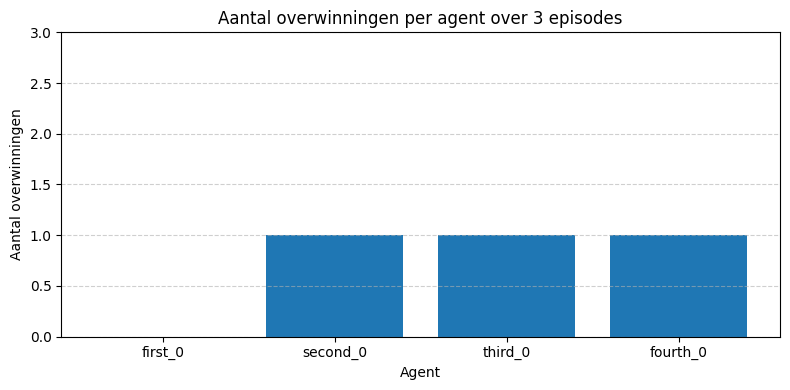

In [15]:
agents = list(eval_env.possible_agents)
plt.figure(figsize=(8, 4))
plt.bar(agents, [wins[a] for a in agents])
plt.title("Aantal overwinningen per agent over 3 episodes")
plt.ylabel("Aantal overwinningen")
plt.xlabel("Agent")
plt.ylim(0, num_episodes)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In de bovenstaande figuur is een snelle test uitgevoerd met drie episodes, waarin te zien is dat elk van de agents één keer heeft gewonnen. Door tijdsbeperkingen is het volledige experiment met twintig episodes niet opnieuw gedraaid. Eerdere runs lieten echter vergelijkbare patronen zien, waarbij de getrainde PPO-agent geen significant voordeel behaalde ten opzichte van willekeurige tegenstanders. Deze korte test bevestigt het beeld dat het model in de huidige vorm niet consistent beter presteert dan de baseline.



---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H7: Rapportage en Reflectie</strong></h2>
</div>

<a name='7.1'></a>
<h3>&sect;7.1 : Probleemstelling</h3>

In hoofdstuk 3.1 is de probleemanalyse uiteengezet. Daarin is beschreven dat het trainen van een reinforcement learning-agent binnen een multi-agent omgeving, zoals de Atari-game Warlords, een extra laag complexiteit met zich meebrengt. De aanwezigheid van meerdere agents zorgt ervoor dat strategieën niet op zichzelf staan, maar voortdurend moeten worden bijgestuurd op basis van het gedrag van de andere spelers in de omgeving.

Binnen dit project hebben wij onderzocht hoe wij een agent kunnen trainen die effectief leert omgaan met deze dynamiek. Hiervoor is het PPO-algoritme ingezet, dat zich in eerdere onderzoeken bewezen heeft als stabiele keuze binnen omgevingen met meerdere actoren.

De centrale probleemstelling die wij tijdens het project hebben onderzocht, luidde als volgt:

- Hoe trainen wij een reinforcement learning-agent in een multi-agent omgeving als Warlords zodanig dat deze effectief leert concurreren met andere agents, en hoe evalueren wij of deze aanpak beter presteert dan een baseline zoals een random policy?

Deze probleemstelling heeft richting gegeven aan onze ontwerpkeuzes, de implementatie van het model en de manier waarop we de prestaties hebben geëvalueerd. In de volgende hoofdstukken wordt toegelicht hoe we dit traject technisch en analytisch hebben aangepakt.

<a name='7.2'></a>
<h3>&sect;7.2: Methodologie en aanpak</h3>



Voor dit project hebben wij een eigen trainingsklasse ontwikkeld waarin PPO is toegepast op de multi-agent omgeving *Warlords*, afkomstig uit de PettingZoo-bibliotheek. Deze omgeving bestaat uit vier gelijktijdige agents die ieder hun eigen doel nastreven. Binnen deze context hebben wij één agent getraind met reinforcement learning, terwijl de overige drie agents willekeurige acties uitvoerden. Zo werd een gecontroleerde multi-agent setting gecreëerd waarin het leerproces van één agent centraal stond.

De omgeving is voorbereid met behulp van SuperSuit-wrappers:
- `black_death_v3` zorgt ervoor dat agents die zijn uitgeschakeld correct worden afgehandeld;
- `color_reduction_v0` reduceert de visuele input tot grijstinten;
- `resize_v1` schaalt de input terug naar 84x84 pixels;
- `frame_stack_v1` voegt temporele informatie toe via frame-stacking.

Daarna is de omgeving geconverteerd naar een vectorized variant via `pettingzoo_env_to_vec_env_v1` en `concat_vec_envs_v1`, zodat PPO parallel over meerdere instanties kon trainen. Dit verhoogde de efficiëntie en zorgde voor snellere convergentie.

Het PPO-algoritme is ingezet met een convolutionele neurale netwerkpolicy (`CnnPolicy`) en de volgende hyperparameters:
- Learning rate: 2.5e-4  
- Batch size: 256  
- N steps: 128  
- N epochs: 4  
- Entropy coefficient: 0.01  
- GAE lambda: 0.95  
- Discount factor (gamma): 0.99  
- Clip range: 0.1  
- Value function coefficient: 0.5  
- Max gradient norm: 0.5  

De agent is getraind op een totaal van 4 miljoen timesteps, verdeeld over twee parallelle instanties van de omgeving. Na het trainen is het model lokaal opgeslagen en opnieuw ingeladen voor evaluatie.

Voor de evaluatie is het getrainde model 20 keer getest in nieuwe episodes. Hierbij zijn de totale beloning per agent en het aantal gewonnen rondes bijgehouden. De agent onder controle van het getrainde PPO-model speelde elke keer tegen drie agents met willekeurige acties. De gemiddelde reward en het aantal overwinningen zijn berekend over alle testepisodes. De resultaten van deze simulaties zijn gebruikt om het gedrag en de effectiviteit van het model te analyseren.

De volledige trainings- en evaluatieprocedure is ondergebracht in een gestructureerde codebase, met duidelijke functies voor omgeving, training, laden en testen van het model. Dit maakt het systeem reproduceerbaar, transparant en geschikt voor verdere uitbreiding of vergelijking met alternatieve strategieën.


<a name='7.3'></a>
<h3>&sect;7.3: Samenvatting van resultaten</h3>





Na het trainen van het PPO-model op 4 miljoen timesteps is het model geëvalueerd in 20 testepisodes. Tijdens deze evaluatie speelde de getrainde agent (`first_0`) tegen drie tegenstanders die willekeurige acties uitvoerden. Voor elke episode is geregistreerd wat de beloning per agent was, en welke agent als laatste overbleef in het spel.

De resultaten laten zien dat de PPO-agent (`first_0`) gemiddeld slechter presteerde dan de drie random agents. Over 20 testgames behaalde deze agent een gemiddelde reward van -0.90 en wist hij slechts 1 keer als winnaar te eindigen. De overige agents, hoewel volledig gestuurd door random acties, scoorden beter op beide onderdelen.

De resultaten per agent waren als volgt:

| Agent          | Gem. Reward | Aantal Overwinningen |
|----------------|-------------|-----------------------|
| **first_0 (PPO)** | **-0.90**    | **1**                  |
| second_0       | -0.50        | 5                     |
| third_0        | -0.40        | 6                     |
| fourth_0       | -0.20        | 8                     |

Hoewel deze resultaten op het eerste gezicht teleurstellend lijken, is het belangrijk om de evaluatiecontext goed te begrijpen. De PPO-agent is namelijk getraind in een situatie waarbij alle agents door dezelfde PPO-policy werden bestuurd (zelf-spelend), maar is geëvalueerd in een omgeving met volledig willekeurige tegenstanders. Het gedrag van deze random agents wijkt sterk af van wat het model tijdens training heeft gezien.

Dit verschil in dynamiek kan ervoor gezorgd hebben dat het geleerde beleid van de PPO-agent niet goed aansluit op de evaluatiesetting. Omdat de tegenstanders zich totaal onvoorspelbaar gedragen, is het moeilijk om hier consistente strategieën tegenover te zetten, zeker als daar tijdens de training geen sprake van was.

De test bevestigt dat reinforcement learning binnen een multi-agent setting sterk afhankelijk is van de samenstelling en consistentie van de omgeving. Om betere prestaties te behalen, zou een volgende stap kunnen zijn om de PPO-agent ook te trainen tegen agents met niet-random gedrag, zodat hij beter leert omgaan met realistischere spelsituaties.


<a name='7.4'></a>
<h3>&sect;7.4: Reflectie op model, prestaties en uitbreidingsmogelijkheden</h3>




Tijdens dit project is gekozen voor PPO als reinforcement learning-algoritme, vanwege de stabiliteit en geschiktheid voor visuele input in omgevingen met discrete actie-ruimtes. De PPO-agent is getraind in een zelf-spelende setting, waarbij alle agents in de omgeving gebruikmaakten van dezelfde policy. Dit zorgde voor een gecontroleerde en consistente leeromgeving, waarin het model voornamelijk leerde te reageren op zijn eigen gedrag.

De uiteindelijke prestaties tijdens de evaluatie vielen tegen. De PPO-agent presteerde slechter dan de random agents waartegen hij getest werd. Een belangrijke verklaring hiervoor is het verschil tussen de trainings- en testomgeving. Tijdens het testen kreeg de agent te maken met drie volledig willekeurige tegenstanders. Dit soort gedrag wijkt sterk af van wat het model tijdens training heeft meegemaakt, waardoor het getrainde beleid niet goed bleek te generaliseren naar deze nieuwe situatie.

Een andere mogelijke factor is de relatief korte trainingstijd. Vier miljoen timesteps lijkt veel, maar voor visuele input en complexe multi-agent interacties is dit vaak onvoldoende om stabiele strategieën aan te leren. Ook de complexiteit van de observatiestructuur (grijswaarden, 84x84 resolutie, 4 gestackte frames) kan het leerproces bemoeilijkt hebben.

Ondanks de tegenvallende resultaten biedt het project waardevolle inzichten voor verdere uitbreiding. Enkele mogelijkheden voor verbetering zijn:
- Trainen tegen bots met gescripte of semi-consistente strategieën in plaats van random gedrag.
- Het trainen van meerdere agents tegelijk met onafhankelijke policies, zodat realistischere interacties ontstaan.
- Het uitbreiden van de trainingstijd of gebruikmaken van curriculum learning (eerst eenvoudige tegenstanders, daarna moeilijker).
- Het loggen van metrics en gedrag tijdens training, om het leerproces beter te kunnen volgen en analyseren.

De resultaten benadrukken dat reinforcement learning in een multi-agent context sterk afhankelijk is van de kwaliteit van de omgeving en de tegenstanders. Een goed gekozen trainingsopstelling is cruciaal voor het succes van het eindmodel. Hoewel de prestatie van het huidige model beperkt was, vormt dit project een stevig fundament voor meer geavanceerde MARL-experimenten.



![PPO agent 4 miljoen](game_9.mp4)


---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H8: Literatuurlijst</strong></h2>
</div>

- Scharwächter, V. (2024, 15 juli). *Probleemanalyse maken voor je scriptie | Betekenis & Voorbeeld.* Scribbr. https://www.scribbr.nl/starten-met-je-scriptie/probleemanalyse/
- PPO — Stable Baselines3 2.7.0a0 documentation. (z.d.). https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
- PettingZoo documentation. (z.d.). https://pettingzoo.farama.org/environments/atari/warlords/
- PettingZoo documentation. (z.d.-b). https://pettingzoo.farama.org/api/wrappers/supersuit_wrappers/


---
<div style="background-color:LightBlue; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong>H9: Beoordelingscriteria</strong></h2>
</div>

Je werk wordt beoordeeld op de volgende aspecten:
1.	**Keuze van algoritme en trainingsstrategie**: Is het gekozen algoritme geschikt voor de omgeving? Is de trainingsmethode van de agent relevant voor deze setting? Wordt er rekening gehouden met de aanwezigheid van meerdere agenten?
2.	**Technische diepgang**: Worden neural network-componenten (indien van toepassing) correct toegepast? Is er aandacht voor alle cruciale onderdelen van de DRL-pijplijn (zoals experience replay en policy updates)?
3.	**Implementatie en testen**: Is het multi-agent Reinforcement Learning-algoritme correct geïmplementeerd, met goed gestructureerde en werkende code? Is het getest in een multi-agentomgeving?
4.	**Rapportage**: Zijn de methodologie en keuzes goed onderbouwd met wetenschappelijke literatuur? Is het rapport helder en gestructureerd?
5.	**Reproduceerbaarheid**: Is de code duidelijk, goed gedocumenteerd en eenvoudig te reproduceren?
6.	**Bonuspunten**: Aan het einde van het project neemt je agent het in een toernooi op tegen je klasgenoten. (De details hierover volgen later.) Het winnende team van het toernooi krijgt 5 bonuspunten bovenop het aantal behaalde punten met de opdracht.
